PROJECT GOAL

Main aim of this project is to check the most improved and worst improved teams in 2022 and whether the the teams maintained their ranks.

Data Sources:

https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup?select=fifa_ranking_2022-10-06.csv



IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD AND READ DATA FROM VARIOUS SOURCES

Load and read data from various sources.


In [2]:
data_path1 = 'https://raw.githubusercontent.com/Mbicha/data_science/main/data/ranking_part3.csv'
data_path2 = r'https://raw.githubusercontent.com/Mbicha/data_science/main/data/ranking_part2.json'
data_path3 = 'fifa_ranking_2022-10-06.csv'

In [3]:
def load_data(path1, path2, path3):
    """Read data from sorces"""
    df = pd.read_csv(path1)
    df1 = pd.read_json(path2)
    df2 = pd.read_csv(path3)
    return df, df1, df2

In [4]:
football_df1, football_df2, football_df3 = load_data(data_path1, data_path2, data_path3)

In [5]:
football_df1.head(2)

,team,team_code,association,rank,previous_rank,points,previous_points
0,Malawi,MWI,CAF,124,122,1144.97,1144.77
1,Zimbabwe,ZIM,CAF,125,123,1138.56,1138.56


In [6]:
football_df2.head(1)

,previous_rank,points,previous_points
0,1,1841.3,1837.56


In [7]:
football_df3.head(1)

,team,team_code,association,rank,previous_rank
0,Brazil,BRA,CONMEBOL,1,1


Merge and combine datasets. In this section, we are going to merge datasets using pandas dataframe merging functions such as merge, concat and join.

In [8]:
def datasets_merge():
    """Merging datasets"""
    merge_one = pd.merge(football_df2, football_df3, on=['previous_rank', 'previous_rank'])
    return pd.concat([merge_one, football_df1], axis = 0, ignore_index = True)

In [9]:
football_df = datasets_merge()
football_df.head(3)

,previous_rank,points,previous_points,team,team_code,association,rank
0,1,1841.30,1837.56,Brazil,BRA,CONMEBOL,1
1,2,1816.71,1821.92,Belgium,BEL,UEFA,2
2,3,1773.88,1770.65,Argentina,ARG,CONMEBOL,3


**DATA CLEANING, TRANSFORMATION AND VISUALIZATION**

Most of the data id very dirty and it is good to check missing values, names of the columns, datatypes and handle dymmy variables before proceeding. In this section, we are going to transform and clean data as well as visualize.

1. Missing Data

In [10]:
def missing_data(dataframe):
    """Check missing data"""
    return dataframe.isna().sum()

In [11]:
missing_data(football_df)

previous_rank      0
points             0
previous_points    0
team               0
team_code          0
association        0
rank               0
dtype: int64

From the above, we observe that, data their is no missing data.

2. Check data types of each column.

We check datatype by running info() in our dataframe.

In [12]:
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   previous_rank    211 non-null    int64  
 1   points           211 non-null    float64
 2   previous_points  211 non-null    float64
 3   team             211 non-null    object 
 4   team_code        211 non-null    object 
 5   association      211 non-null    object 
 6   rank             211 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 11.7+ KB


From the above, we deduce that, every column has correct datatype.

3. Replace remove _ from the column names. For instance like in column *previous_rank*, when we remove _ the result will be *previousrank.*

In [13]:
def remove_underscore_in_column_names(dataframe, remove='_'):
    """Revomes '_' from column names"""
    dataframe.columns = dataframe.columns.str.replace(remove,'')
    return dataframe

In [14]:
football_df = remove_underscore_in_column_names(football_df)
football_df.columns

Index(['previousrank', 'points', 'previouspoints', 'team', 'teamcode',
       'association', 'rank'],
      dtype='object')

4. Remove column

Since team and teamcode represent the same thing, then it is good if we remove teamcode.

In [15]:
def remove_column(dataframe, column='teamcode'):
    """Remove Column\nThe column is set to teamcode as a default"""
    return dataframe.drop([column], axis=1)

In [16]:
football_df = remove_column(football_df)

In [17]:
football_df.head()

,previousrank,points,previouspoints,team,association,rank
0,1,1841.30,1837.56,Brazil,CONMEBOL,1
1,2,1816.71,1821.92,Belgium,UEFA,2
2,3,1773.88,1770.65,Argentina,CONMEBOL,3
3,4,1759.78,1764.85,France,UEFA,4
4,5,1728.47,1737.46,England,UEFA,5


5. Add Column

Add new column to of the mean of points and previouspoints.

In [18]:
def add_new_column(dataframe, col1, col2):
    """Return dataframe with a new column"""
    mean_lst = []
    diff_lst = []
    for index, row in dataframe.iterrows():
        mean_value = round((row[col1] + row[col2]) / 2, 2)
        diff_value = round((row[col1] - row[col2]), 2)
        mean_lst.append(mean_value)
        diff_lst.append(diff_value)

    dataframe['meanvalue'] = mean_lst
    dataframe['diff'] = diff_lst
    return dataframe

In [19]:
football_df = add_new_column(football_df, 'points', 'previouspoints')
football_df.head(3)

,previousrank,points,previouspoints,team,association,rank,meanvalue,diff
0,1,1841.30,1837.56,Brazil,CONMEBOL,1,1839.43,3.74
1,2,1816.71,1821.92,Belgium,UEFA,2,1819.32,-5.21
2,3,1773.88,1770.65,Argentina,CONMEBOL,3,1772.27,3.23


6. Find values

In this section, we are going to find maximum and minimum value to find the most and least improved country from the differnce column.

In [20]:
print(football_df[football_df['diff'] == football_df['diff'].max()])
print(football_df[football_df['diff'] == football_df['diff'].min()])

     previousrank   points  previouspoints        team association  rank  \
122           128  1146.72         1127.17  Azerbaijan        UEFA   123   

     meanvalue   diff  
122    1136.95  19.55  
    previousrank   points  previouspoints             team association  rank  \
64            64  1358.51          1375.2  North Macedonia        UEFA    65   

    meanvalue   diff  
64    1366.86 -16.69  


**PIVOT TABLES**

In [21]:
pivot1 = pd.pivot_table(data=football_df, index='association', values=['points', 'previouspoints'])

In [22]:
pivot1

,points,previouspoints
association,,
AFC,1137.970000,1137.179783
CAF,1195.924815,1195.970000
CONCACAF,1094.896286,1096.044571
CONMEBOL,1554.936000,1553.818000
OFC,983.504545,983.956364
UEFA,1380.894364,1380.732909


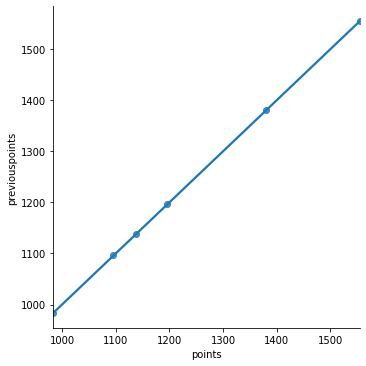

In [23]:
sns.lmplot(data=pivot1, x='points', y='previouspoints')

In [24]:
pivot2 = pd.pivot_table(data=football_df, index='association', values='meanvalue')

In [25]:
pivot2

,meanvalue
association,
AFC,1137.575000
CAF,1195.947593
CONCACAF,1095.470286
CONMEBOL,1554.377000
OFC,983.730909
UEFA,1380.813818


**Visualizations**

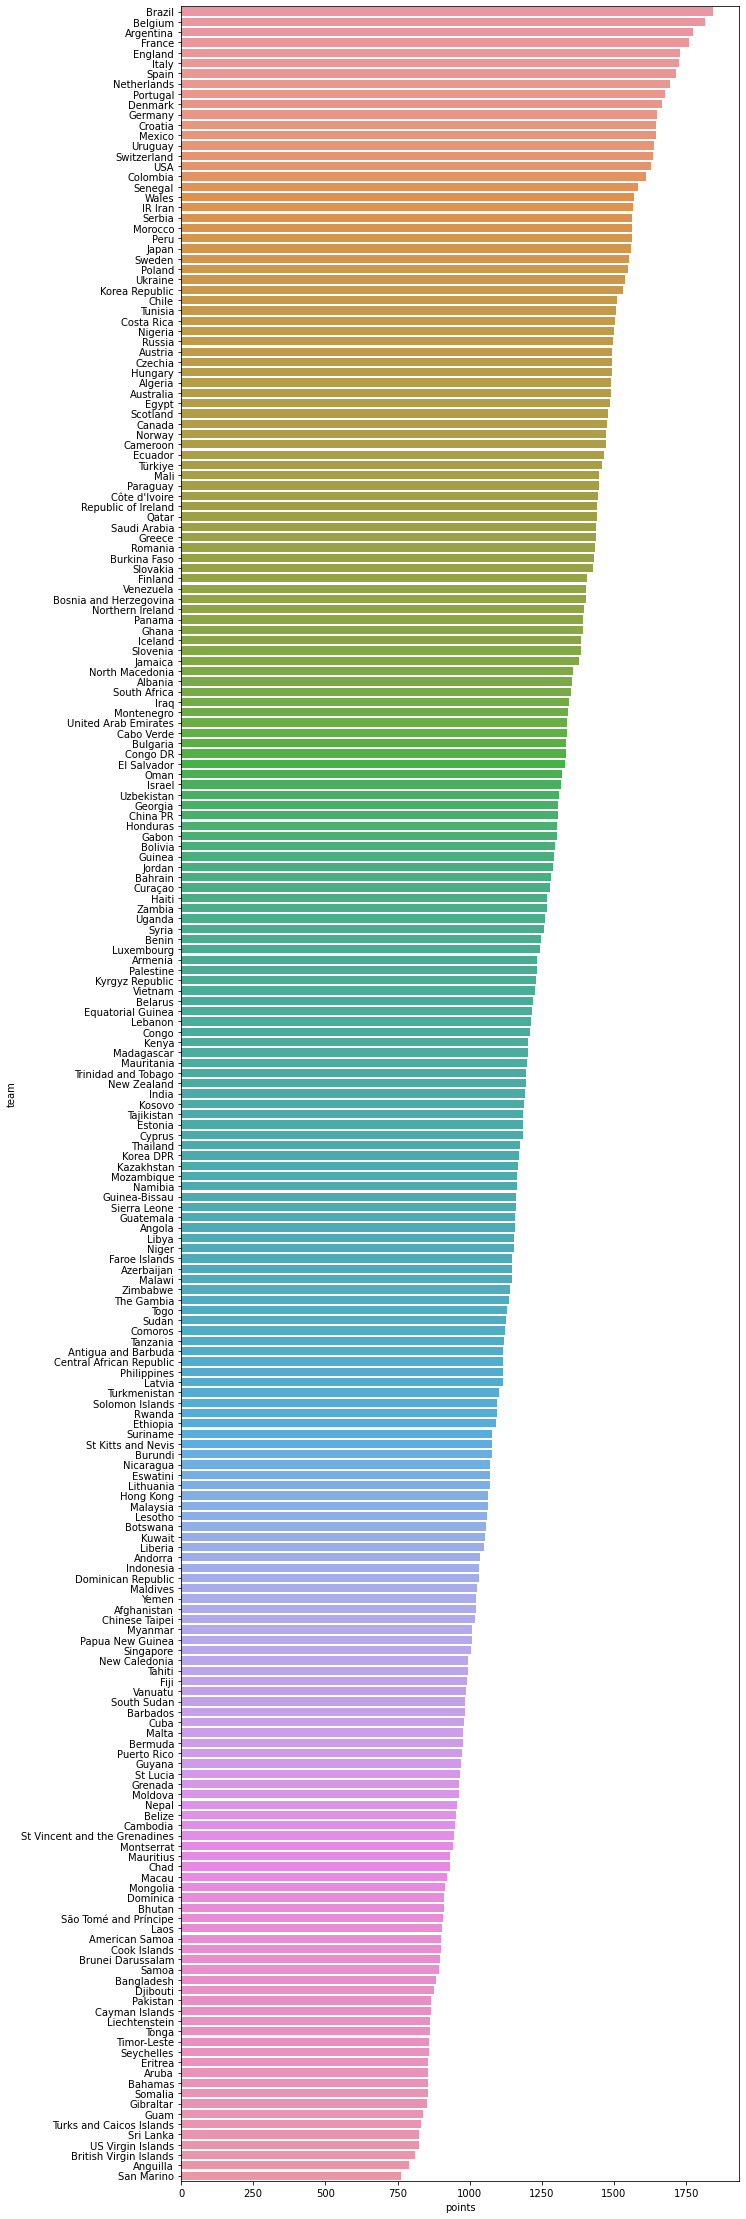

In [26]:
plt.figure(figsize=(10,40))
sns.barplot(data=football_df, x='points', y='team')

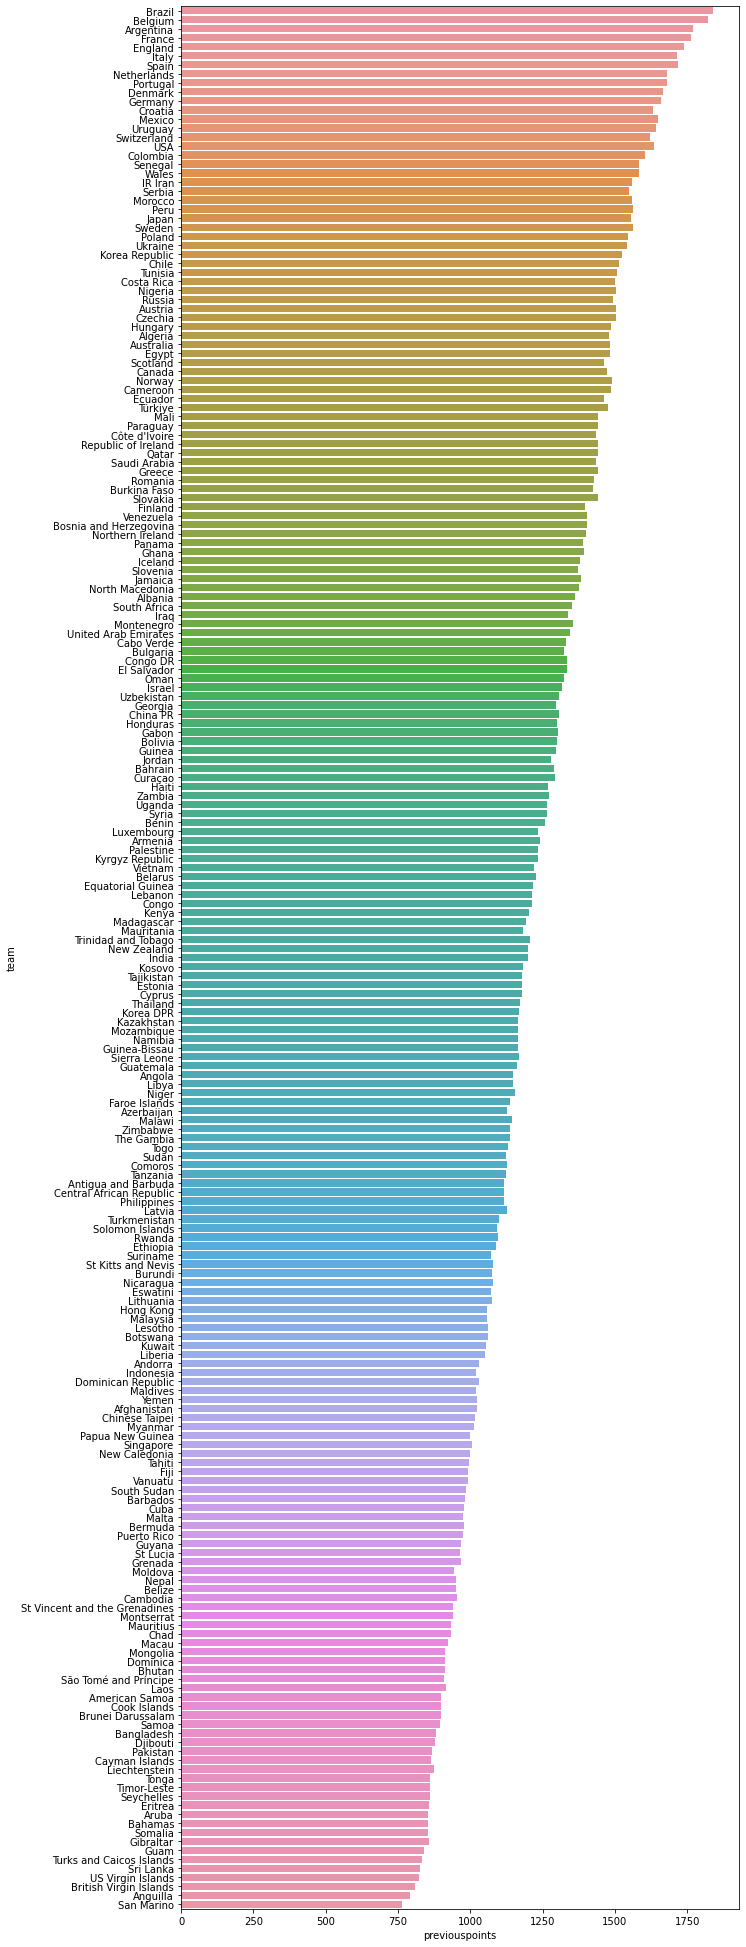

In [27]:
plt.figure(figsize=(10,35))
sns.barplot(data=football_df, x='previouspoints', y='team')

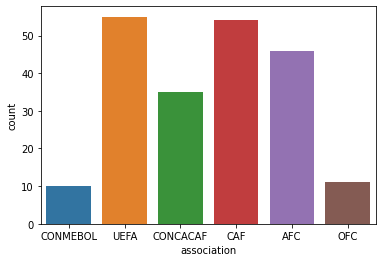

In [28]:
sns.countplot(data=football_df, x='association')

**CONCLUSION**

From above visualizations, we deduce that;

1. There is no big difference between previous points and current points.
2. Azerbaijan is the most improved team with 19.55.
3. North Macedonia is the worst performing team with -16.69
4. The first 11 teams maintained their ranks.